<a href="https://colab.research.google.com/github/ayushsahu1999/100-days-of-ml/blob/master/CIFAR100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
cifar_dataset = tf.keras.datasets.cifar100
(x_train, y_train), (x_test, y_test) = cifar_dataset.load_data()

It consists of 32*32 colored images (num_samples, 32, 32, 3)
It have 50,000 training and 10,000 test images.

In [2]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu, input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(100, activation=tf.nn.softmax)
])

In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               7373312   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               51300     
Total params: 7,426,404
Trainable params: 7,426,404
Non-trainable params: 0
_________________________________________________________________


In [5]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy') > 0.95):
      print ("\nAccuracy is now above 95% so stopping training!")
      self.model.stop_training = True

callbacks = myCallback()

In [6]:
model.fit(x_train, y_train, epochs=25, callbacks=[callbacks])

Epoch 1/25
1563/1563 [==============================] - 5s 3ms/step - loss: 3.4882 - accuracy: 0.1822
Epoch 2/25
1563/1563 [==============================] - 5s 3ms/step - loss: 2.7271 - accuracy: 0.3218
Epoch 3/25
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3487 - accuracy: 0.3991
Epoch 4/25
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0284 - accuracy: 0.4683
Epoch 5/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7304 - accuracy: 0.5340
Epoch 6/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4477 - accuracy: 0.6023
Epoch 7/25
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1859 - accuracy: 0.6666
Epoch 8/25
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9458 - accuracy: 0.7320
Epoch 9/25
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7476 - accuracy: 0.7859
Epoch 10/25
1563/1563 [==============================] - 5s 3ms/step - loss: 0.585

In [7]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 6.7613 - accuracy: 0.3064


[6.761319637298584, 0.30640000104904175]

In [13]:
import numpy as np
image = 1
answer = np.argmax(model.predict(x_test[image].reshape(1, 32, 32, 3)), axis=-1)
print (answer.squeeze())

97


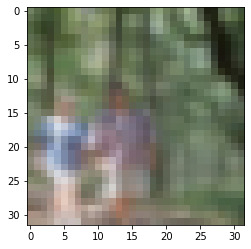

In [14]:
import matplotlib.pyplot as plt
plt.imshow(x_test[image].reshape(32, 32, 3))